## Singular Value Decomposition and Image Compression

We use singular value decomposition (SVD) of a matrix, one of the most commonly used techniques in data analysis. The SVD has many interesting applications. Here we will apply the SVD to data compression: we will use the SVD to compress an image.

## The singular value decomposition (SVD)

Let $A \in \mathbb{R}^{m \times n}$ be a matrix of rank $r$, where the rank of $A$ is the number of linearly independent columns of $A$. The SVD of $A$ is a decomposition of the form
  $$ A = U \Sigma V^T $$
where $U \in \mathbb{R}^{m \times m}$ is an orthogonal matrix ($U^T U = I$), $V \in \mathbb{R}^{n \times n}$ is an orthogonal matrix, and $\Sigma \in \mathbb{R}^{m \times n}$ is a diagonal matrix with $r$ positive scalars $\sigma_1, \dots, \sigma_r$ on the diagonal (in the $r \times r$ block on the upper left) and zeros everywhere else. The scalars $\sigma_1, \dots, \sigma_r$ are called the singular values and are given by
  $$\sigma_i = \sqrt{\text{$i$-th eigenvalue of $A^\top A$}},$$
and by convention they appear in non-increasing order:
  $$\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r.$$
The columns of $U$ and $V$ respectively are called the left and right singular vectors of $A$, and can be obtained by taking an orthonormal set of eigenvectors for the matrices $A A^T$ and $A^T A$.

## The SVD and data compression

We can approximate a given matrix $A$ of rank $r$ by a matrix of smaller rank $k \leq r$ by truncating its SVD $A = U \Sigma V^T$ as follows. Consider an SVD $A = U \Sigma V^T$. Let
  $$ A_k = U_k \Sigma_k V^T_k $$
where $U_k$ has the first $k$ columns of $U$, $V_k$ has the first $k$ columns of $V$, and $\Sigma_k$ is the upper left $k \times k$ block of $\Sigma$. A well-known result states that $A_k$ is the optimal solution to
  $$ \min_{B \in \mathbb{R}^{m \times n} \colon \mathrm{rank}(B) \leq k} \|A - B\|_F, $$
where $\|C\|_F = \sqrt{\sum_{i, j} C^2_{ij}}$ is the Frobenius norm of a matrix. 

Note that the approximation $A_k$ can be represented using $(n + m + 1)k$ numbers. In contrast, we need $mn$ numbers to represent $A$.

Your task is to show some basic facts about the SVD and to apply it to image compression.

## We will show that the eigenvalues of $A^T A$ are non-negative (and thus the singular values are non-negative reals).

<b>Proof:</b>

1. For some eigen value $\lambda$ and corresponding eigen vector $x$ we have $(A^TA)x=\lambda x$.
2. Let's multiply both sides by $x^T$: $x^T(A^TA)x=\lambda x^Tx$.
3. That leaves us with: $(Ax)^T(Ax)=\lambda x^Tx$.
4. We can rewrite this as: $\lambda =\frac{(Ax)^T(Ax)}{x^Tx}$
5. We can simplify this as: $\lambda =\frac{\|\mathbf{Ax}\|^2}{\|\mathbf{x}\|^2}$
6. We know the euclidean norm yields a non-negative value, thus we know $A^TA$ must have non-negative eigen values.

## We will show that if $u_i$ and $u_j$ are eigenvectors of $A^T A$ corresponding to distinct eigenvalues $\lambda_i \neq \lambda_j$ then $u_i$ and $u_j$ are orthogonal.

<b>Proof:</b>

1. For eigen vectors $u_i$ and $u_j$ and their corresponding eigen values $\lambda_i \neq \lambda_j$ we can set up the following equations: $A^TAu_i=\lambda_iu_i, A^TAu_j=\lambda_ju_j$.
2. We can then multiply the left side of the first equation by $u_j^T: $u_j^TA^TAu_i=\lambda_iu_j^Tu_i$.
3. Since $A^TA$ is symmetric we know $A^TA=(A^TA)^T$, and we can rewrite the equation from step 2 like this: $(A^TAu_j)^Tu_i=\lambda_iu_j^Tu_i$.
4. Now, we can substitute the second equation in step 1 from the equation in stepn 3: $(\lambda_ju_j)^Tu_i=\lambda_iu_j^Tu_i$.
5. We can take the transpose and subtract the right side over: $\lambda_ju_j^Tu_i-\lambda_iu_j^Tu_i$=0.
6. We can factor out the $u_j^Tu_i$ leaving us with $u_j^Tu_i(\lambda_j-\lambda_i)=0$.
7. We know $\lambda_i \neq \lambda_j$, thus $u_j^Tu_i=0$ meaning the dot product of $u_j$ and $u_i$ is zero, indicating $u_i$ and $u_j$ are orthagonal.

## Question 3

We will now use the SVD to compress an [image of Rhett the BU Terrier](https://www.dropbox.com/s/g8v91giu1ytkiqx/bulogo.jpg?dl=0).

In [1]:
import numpy as np
from numpy import linalg
import cv2
import matplotlib.pyplot as plt

In [26]:
# load a color image in grayscale
img = cv2.imread('bulogo.jpg', 0)

# make the image into a matrix
A = np.array(img)

# compute the SVD of A
U,S,V = linalg.svd(A)

#compute the svd for k = 25, 50, 75, 100
k = [25, 50, 75, 100]
#variables
U_k=[]
S_k=[]
Vt_k=[]
A_k=[]
norm = []
x=0
for i in k:
    #finding approximations
    U_temp = U[:, :i]
    S_temp = np.diag(S[:i])
    Vt_temp = V[:i, :]
    
    #storing the approximations
    U_k.append(U_temp)
    S_k.append(S_temp)
    Vt_k.append(Vt_temp)
    
    #finding the approximated image
    A_temp = np.dot(U_temp, np.dot(S_temp, Vt_temp))
    A_k.append(A_temp)
    
    #finding the norm
    norm_temp = linalg.norm(A - A_temp)
    norm.append(norm_temp)
    
    x += 1

    #print norms
    print ("Norm for k = ", i, " is ", norm[x-1])
    
# show the image
#cv2.imshow('image',A)
#cv2.waitKey(0)

# write the  image
#cv2.imwrite('bulogo-gray.png',A)

Norm for k =  25  is  18440.46773755848
Norm for k =  50  is  11761.946205025828
Norm for k =  75  is  8299.69463952226
Norm for k =  100  is  6284.2397981279455


## Generating Plots

Text(0.5, 1.0, 'Original')

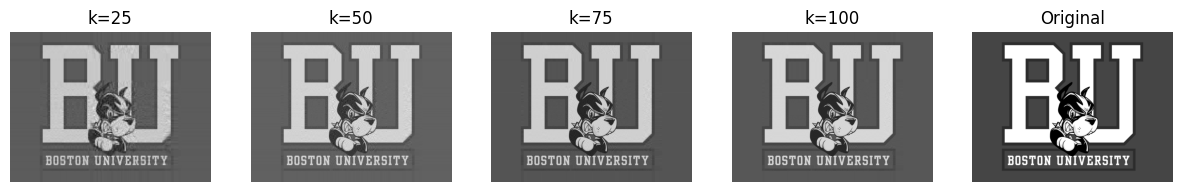

In [27]:
# Display the approximated images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, (image, k) in enumerate(zip(A_k, k)):
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'k={k}')

# Display the original image
axes[4].imshow(A, cmap='gray')
axes[4].axis('off')
axes[4].set_title('Original')

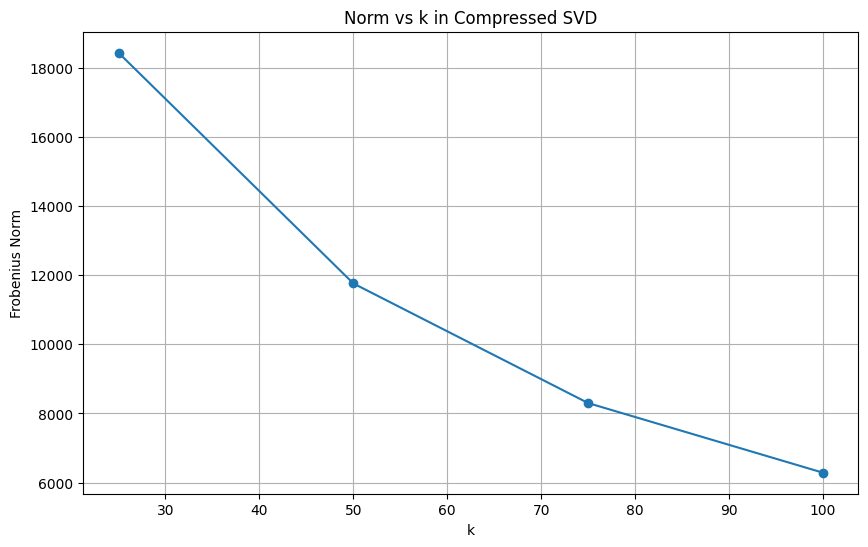

In [18]:
# Plotting norm vs k
k = [25, 50, 75, 100]
plt.figure(figsize=(10, 6))
plt.plot(k, norm, marker='o')
plt.xlabel('k')
plt.ylabel('Frobenius Norm')
plt.title('Norm vs k in Compressed SVD')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Compression vs k in Compressed SVD')

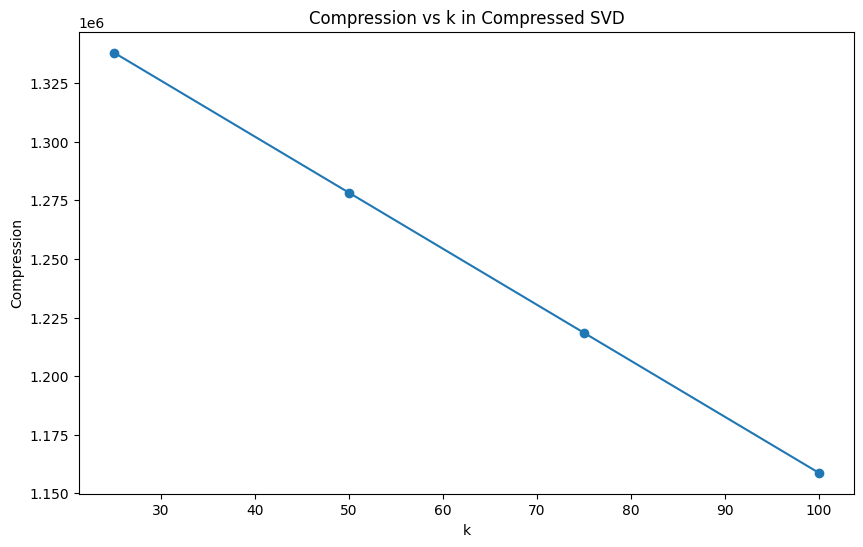

In [20]:
# compression
compression = []
m, n = A.shape
k = [25, 50, 75, 100]
for i in k:
    compression.append((m*n) - (1+m+n)*i)

#plotting compression vs k
plt.figure(figsize=(10, 6))
plt.plot(k, compression, marker='o')
plt.xlabel('k')
plt.ylabel('Compression')
plt.title('Compression vs k in Compressed SVD')